# Streams and I/O Redirection

* Unix has a wide variety of commands that we can use to perform a tasks like searches and listing the contents of the current working directory. 
* Unix commands help to manipulate and understand the contents of huge files without being dependent on a development environment.

In [1]:
! cp data/a.txt data/b.txt

## Pipes
#### To combine progams we use the ( | ) operator


UNIX has a feature called pipes which help us combine programs by sending the standard output of one program as the input to the next program.

In [2]:
!echo "hello there" | sed "s/hello/hi/"

hi there


In [3]:
! grep 'the' data/HandRLakeDistrict.txt | wc -w

      95


Every UNIX process has four key components:<br>
* a current working directory
* standard input(keyboard)
* standard output(terminal/screen)
* standard error. 



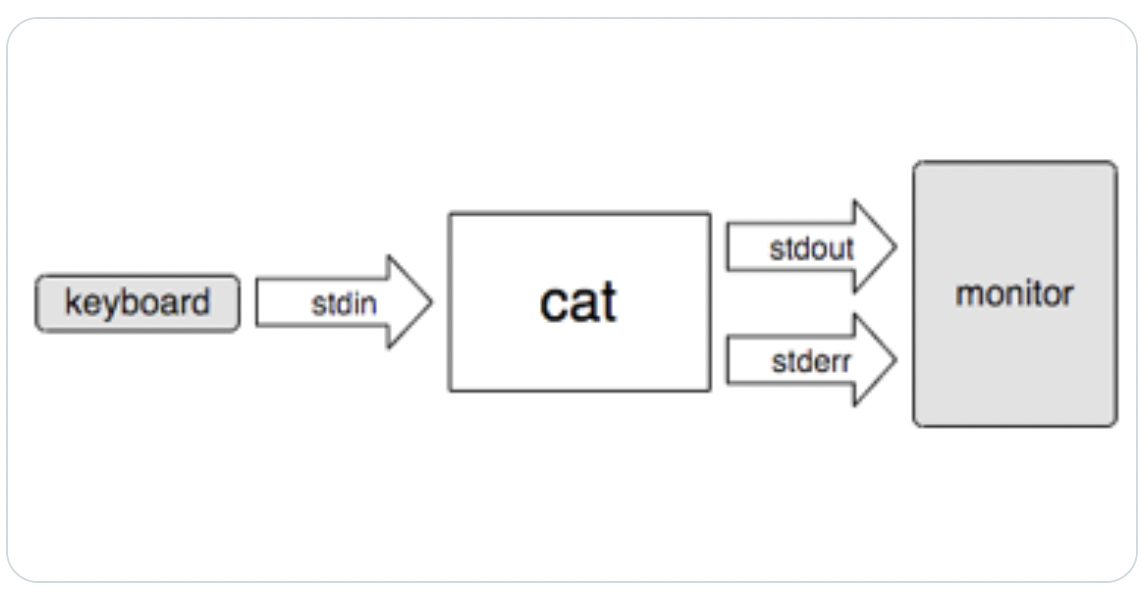

In [4]:
from PIL import Image
im = Image.open("data/streams.png") 
im

## Redirection

We can redirect the output to a file instead. The " > " operator redirects the command standard output to a file and " < " operator that takes the a file as input to a command. The " >> " operator appends to a file.


In [5]:
! echo "a\nb\nc\nd"

a
b
c
d


In [6]:
! echo "a\nb\nc\nd" > foo.txt

In [7]:
! cat foo.txt

a
b
c
d


In [8]:
! sort -r < foo.txt

d
c
b
a


We can redirect the output or error of a command from standard output and standard error to files. This helps us store the output for future reference. 
File descriptor 2 represents standard error. 

In [9]:
! can 2> error.txt

In [10]:
! cat error.txt

zsh:1: command not found: can


### Fun example Below!

For example, we can fetch data from the internet using the curl command. The below command fetches data from the given url and stores it in a file. We can then perform manipulations on that file. If we do not redirect the output to a file, the outout is displayed on the standared output, which is the screen and cannot be used further.

Use curl to transfer data from the below url and save the contents to imac.pdf

In [11]:
! curl "https://manuals.info.apple.com/MANUALS/1000/MA1733/en_US/imac-late2015-essentials.pdf" > imac.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.5M  100 24.5M    0     0  6703k      0  0:00:03  0:00:03 --:--:-- 6701k


use pdftotext to convert a pdf file to text file

In [12]:
! pdftotext imac.pdf > imac.txt

Let us read the text file and print the words and the number of times they appear in decreasing order.
This will hgelp us in extracting the words that are important in a file.<br>



In [13]:
! tr -s ' ' '\n' < imac.txt | tr 'A-Z' 'a-z' | sort | uniq -c | sort -r -n | head -20  

 838 the
 565 to
 478 your
 418 and
 289 a
 284 you
 260 or
 244 in
 208 on
 192 click
 176 of
 157 apple
 146 with
 136 for
 117 imac
 111 then
 111 can
 105 an
  99 is
  87 use


We are familiar with joins in SQL. A similar thing can be done on the terminal itself where we can combine two separate text files on a common column.

The code below will combine the file_1.txt and file_2.txt on the common column they share.

In [14]:
! cat data/file_1.txt

Student_1 1
Student_2 2
Student_3 3
Student_4 4


In [15]:
! cat data/file_2.txt

101 1
102 2
103 3
104 4


Here -1 2 refers to the use of 2 column of first file as the common field and -2 2refers to the use of 2 column of second file as the common field for joining.

In [16]:
! join -1 2 -2 2 data/file_1.txt data/file_2.txt

1 Student_1 101
2 Student_2 102
3 Student_3 103
4 Student_4 104


#### Another important aspect will be to analyse the csv data.  
You can extract the headers of a csv file to check what data the file contains. Running the command below will print the headers in a single row. To print each header in a single row, we transklate the ',' separator to a new line separator. 

In [17]:
#headers
! head -n1 data/states.csv | tr ',' '\n'

Sate
Unemployment_rate
Population
Homicide_rate


To get the enteries in a column that begin with a particular string, we execute somehting like below.
The csvgrep command grabs the data(full records) in a column(-c), column number 1 searching for the regex pattern(-r) that begins with(^) New. <br>

The data is looked in a file known as states.csv.<br>

The tail +2 command removes the header of the column being analysed and prints out only the matching values in the column (1 in this case). <br>

The csvcut command extracts only the column 1.

In [18]:
#records that start with new
! csvgrep -c 1 -r '^New' -e latin1 data/states.csv | tail +2 | csvcut -c 1

New Hampshire
New Jersey
New Mexico
New York


What if we want to extract the state names that begin with 'New' or end with 'Carolina'.<br>
The command above can be modified to extract such state names.

In [19]:
! csvgrep -c 1 -r '^New|Carolina$' -e latin1 data/states.csv | tail +2 | csvcut -c 1

New Hampshire
New Jersey
New Mexico
New York
North Carolina
South Carolina


In case we want to fetch the records that have state names beginning with 'New' or ending with 'Carolina' and make a smaller subset, we canm execute the command below.


In [20]:
! csvgrep -c 1 -r '^New|Carolina$' -e latin1 data/states.csv | tail +2

New Hampshire,2.9,1372203,1
New Jersey,7.3,8874520,3.6
New Mexico,,2105005,7.1
New York,7.7,19299981,2.8
North Carolina,4.6,10701022,5.8
South Carolina,4.5,5277830,7.8


In case you want to extarct a few columns and club them into a new file, the same can be done.<br>
The paste command will slap the the two files next to each other

In [21]:
! csvcut -c 1 data/states.csv | tail +2 > state_names.txt

In [22]:
! csvcut -c 'Population' data/states.csv | tail +2 > state_population.txt

The folllowing command not merges the files horizontally but also ranks the states on the basis of population in the descending order.

In [23]:
! paste -d" " state_population.txt state_names.txt > population.txt | sort -r -n

39613493 California
29730311 Texas
21944577 Florida
19299981 New York
12804123 Pennsylvania
12569321 Illinois
11714618 Ohio
10830007 Georgia
10701022 North Carolina
9992427 Michigan
8874520 New Jersey
8603985 Virginia
7796941 Washington
7520103 Arizona
6944260 Tennessee
6912239 Massachusetts
6805663 Indiana
6169038 Missouri
6065436 Maryland
5893634 Colorado
5852490 Wisconsin
5706398 Minnesota
5277830 South Carolina
4934193 Alabama
4627002 Louisiana
4480713 Kentucky
4289439 Oregon
3990443 Oklahoma
3552821 Connecticut
3310774 Utah
3185786 Nevada
3167974 Iowa
3033946 Arkansas
2966407 Mississippi
2917224 Kansas
2105005 New Mexico
1951996 Nebraska
1860123 Idaho
1767859 West Virginia
1406430 Hawaii
1372203 New Hampshire
1354522 Maine
1085004 Montana
1061509 Rhode Island
990334 Delaware
896581 South Dakota
770026 North Dakota
724357 Alaska
714153 District of Columbia
623251 Vermont
581075 Wyoming


In [24]:
! csvcut -c 'Unemployment_rate' data/states.csv | tail +2 > state_unemployment.txt

In [25]:
! csvcut -c 'Homicide_rate' data/states.csv | tail +2 > state_homicide.txt

The paste command can also be used to stick more than two files together, where the values are separated by delimiters like " _ ".

In [26]:
! paste -d"__ __" state_names.txt state_unemployment.txt state_homicide.txt > population.txt | sort -r -n | head -10

Wyoming_5.4_2.6
Wisconsin_3.9_3.2
West Virginia_5.3_4.7
Washington_5.2_3.1
Virginia_4.3_5.3
Vermont_3.1_2.2
Utah_2.7_2.4
Texas_6.5_5
Tennessee_4.9_7.8
South Dakota_2.9_2.9


On adding nl command the records of the file get numbered based on the order in which they are present in the file.

In [27]:
! cat data/states.csv | tail +2 | head -10 | nl

     1	Alabama,3.3,4934193,8.3
     2	Alaska,6.6,724357,8.4
     3	Arizona,6.8,7520103,5.9
     4	Arkansas,4.4,3033946,8.6
     5	California,7.7,39613493,4.6
     6	Colorado,6.2,5893634,3.9
     7	Connecticut,7.9,3552821,2.8
     8	Delaware,5.8,990334,5.6
     9	District of Columbia,7,714153,6.8
    10	Florida,5,21944577,5


The command below will delete everything except the the records from 2 to 5.

In [28]:
! cat data/states.csv | tail +2 | sed '2,5!d' 

Alaska,6.6,724357,8.4
Arizona,6.8,7520103,5.9
Arkansas,4.4,3033946,8.6
California,7.7,39613493,4.6


In [29]:
! cat data/states.csv | head -5 | tail +2

Alabama,3.3,4934193,8.3
Alaska,6.6,724357,8.4
Arizona,6.8,7520103,5.9
Arkansas,4.4,3033946,8.6


In [30]:
! cat data/states.csv | head -5 | tail +2 | sed '1d;$d' 

Alaska,6.6,724357,8.4
Arizona,6.8,7520103,5.9
